In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Read buydb.csv and present in DataFrame format

In [3]:
buydb = pd.read_csv('dataset/buydb.csv')
buydb.head()

,mrt_code,mrt_name,address,floor_type,room_num,price,size,floor,parking,link
0,BL18,市政府捷運站,台北市信義區永吉路30巷,整層住家,1,NaN,101.32,4F/4F,無,//rent.591.com.tw/home/house/detail/2/9432834....
1,R07,東門捷運站,台北市大安區金華街,整層住家,3,NaN,101.64,3F/11F,無,//rent.591.com.tw/home/house/detail/2/9380365....
2,R02,象山捷運站,台北市信義區信義路五段,整層住家,3,NaN,102.19,21F/27F,無,//rent.591.com.tw/home/house/detail/2/9270178....
3,BR21,葫洲捷運站,台北市內湖區民權東路六段,整層住家,3,NaN,102.51,6F/14F,無,//rent.591.com.tw/home/house/detail/2/9288753....
4,R03,台北101/世貿捷運站,台北市信義區基隆路二段,整層住家,10,NaN,102.74,11F/12F,無,//rent.591.com.tw/home/house/detail/2/9445274....


## Counting Mrt Code with pandas

In [4]:
buydb_frame = pd.DataFrame(buydb)
buydb_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mrt_code    4698 non-null   object 
 1   mrt_name    4698 non-null   object 
 2   address     4698 non-null   object 
 3   floor_type  4698 non-null   object 
 4   room_num    4698 non-null   int64  
 5   price       4693 non-null   float64
 6   size        4698 non-null   float64
 7   floor       4698 non-null   object 
 8   parking     4698 non-null   object 
 9   link        4698 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 367.2+ KB


In [5]:
mrtname_count = buydb_frame['mrt_name'].value_counts()
mrtname_count[:10]

南京三民捷運站        193
中山國小捷運站        187
新北投捷運站         174
西門捷運站          137
台北101/世貿捷運站    125
龍山寺捷運站         124
松江南京捷運站        121
象山捷運站          120
松山捷運站          114
古亭捷運站          113
Name: mrt_name, dtype: int64

## Counting Mrt Code with python

In [6]:
buydb_mrtname = buydb[buydb.columns[1]] 
buydb_mrtname

0            市政府捷運站
1             東門捷運站
2             象山捷運站
3             葫洲捷運站
4       台北101/世貿捷運站
           ...     
4693        萬芳醫院捷運站
4694      大安森林公園捷運站
4695         六張犁捷運站
4696         新北投捷運站
4697          士林捷運站
Name: mrt_name, Length: 4698, dtype: object

In [7]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [8]:
mrtname_count2 = get_counts(buydb_mrtname)
mrtname_count2

{'市政府捷運站': 103,
 '東門捷運站': 89,
 '象山捷運站': 120,
 '葫洲捷運站': 104,
 '台北101/世貿捷運站': 125,
 '石牌捷運站': 98,
 '劍潭捷運站': 37,
 '中山國小捷運站': 187,
 '芝山捷運站': 104,
 '南港軟體園區捷運站': 46,
 '奇岩捷運站': 65,
 '南京復興捷運站': 87,
 '內湖捷運站': 111,
 '松山捷運站': 114,
 '新北投捷運站': 174,
 '永春捷運站': 111,
 '松江南京捷運站': 121,
 '中正紀念堂捷運站': 34,
 '古亭捷運站': 113,
 '西湖捷運站': 28,
 '木柵捷運站': 19,
 '行天宮捷運站': 60,
 '劍南路捷運站': 23,
 '中山國中捷運站': 101,
 '忠孝新生捷運站': 52,
 '唭哩岸捷運站': 30,
 '北投捷運站': 62,
 '信義安和捷運站': 109,
 '南京三民捷運站': 193,
 '萬隆捷運站': 30,
 '雙連捷運站': 88,
 '善導寺捷運站': 27,
 '大坪林捷運站': 5,
 '科技大樓捷運站': 40,
 '國父紀念館捷運站': 70,
 '辛亥捷運站': 23,
 '大直捷運站': 19,
 '昆陽捷運站': 36,
 '文德捷運站': 58,
 '小南門捷運站': 14,
 '台電大樓捷運站': 66,
 '動物園捷運站': 14,
 '萬芳醫院捷運站': 67,
 '大安捷運站': 51,
 '忠孝復興捷運站': 82,
 '台北車站捷運站': 27,
 '關渡捷運站': 28,
 '復興崗捷運站': 24,
 '士林捷運站': 59,
 '民權西路捷運站': 72,
 '忠孝敦化捷運站': 107,
 '中山捷運站': 109,
 '大安森林公園捷運站': 38,
 '景美捷運站': 42,
 '大橋頭捷運站': 42,
 '公館捷運站': 24,
 '西門捷運站': 137,
 '明德捷運站': 41,
 '麟光捷運站': 26,
 '台北小巨蛋捷運站': 59,
 '港墘捷運站': 34,
 '北門捷運站': 26,
 '後山埤捷運站': 80,
 '六張犁捷運站': 74,
 '松山機場捷運站': 10,
 '東湖捷運站

In [9]:
print('總共幾個捷運站:', len(mrtname_count2))

總共幾個捷運站: 79


## pandas.DataFrame.dropna

In [10]:
buydb.isnull().sum()

mrt_code      0
mrt_name      0
address       0
floor_type    0
room_num      0
price         5
size          0
floor         0
parking       0
link          0
dtype: int64

In [11]:
buydb_cleaned = buydb.dropna()
buydb
buydb_cleaned

,mrt_code,mrt_name,address,floor_type,room_num,price,size,floor,parking,link
0,BL18,市政府捷運站,台北市信義區永吉路30巷,整層住家,1,NaN,101.32,4F/4F,無,//rent.591.com.tw/home/house/detail/2/9432834....
1,R07,東門捷運站,台北市大安區金華街,整層住家,3,NaN,101.64,3F/11F,無,//rent.591.com.tw/home/house/detail/2/9380365....
2,R02,象山捷運站,台北市信義區信義路五段,整層住家,3,NaN,102.19,21F/27F,無,//rent.591.com.tw/home/house/detail/2/9270178....
3,BR21,葫洲捷運站,台北市內湖區民權東路六段,整層住家,3,NaN,102.51,6F/14F,無,//rent.591.com.tw/home/house/detail/2/9288753....
4,R03,台北101/世貿捷運站,台北市信義區基隆路二段,整層住家,10,NaN,102.74,11F/12F,無,//rent.591.com.tw/home/house/detail/2/9445274....
...,...,...,...,...,...,...,...,...,...,...
4693,BR04,萬芳醫院捷運站,台北市文山區興隆路三段,套房,1,17900.0,11.71,6F/10F,無,//rent.591.com.tw/home/house/detail/2/9349910....
4694,R06,大安森林公園捷運站,台北市大安區信義路三段,套房,1,33400.0,11.78,4F/12F,無,//rent.591.com.tw/home/house/detail/2/9115548....
4695,BR07,六張犁捷運站,台北市大安區和平東路三段106號,套房,1,26400.0,11.87,4F/12F,無,//rent.591.com.tw/home/house/detail/2/9443848....
4696,R22A,新北投捷運站,台北市北投區泉源路,套房,1,11700.0,11.98,9F/11F,無,//rent.591.com.tw/home/house/detail/2/9285528....


,mrt_code,mrt_name,address,floor_type,room_num,price,size,floor,parking,link
5,R19,石牌捷運站,台北市北投區石牌路二段,整層住家,4,193000.0,100.02,7F/12F,無,//rent.591.com.tw/home/house/detail/2/9408127....
6,R15,劍潭捷運站,台北市士林區菁山路,整層住家,4,99100.0,100.08,3F/6F,無,//rent.591.com.tw/home/house/detail/2/9299165....
7,O10,中山國小捷運站,台北市中山區民權東路一段,整層住家,4,199900.0,100.26,2F/16F,無,//rent.591.com.tw/home/house/detail/2/9364169....
8,O10,中山國小捷運站,台北市中山區民權東路一段,整層住家,1,188500.0,100.27,13F/16F,無,//rent.591.com.tw/home/house/detail/2/9363137....
9,R17,芝山捷運站,台北市士林區中山北路七段181巷,整層住家,5,241300.0,100.55,3F/5F,無,//rent.591.com.tw/home/house/detail/2/9209040....
...,...,...,...,...,...,...,...,...,...,...
4693,BR04,萬芳醫院捷運站,台北市文山區興隆路三段,套房,1,17900.0,11.71,6F/10F,無,//rent.591.com.tw/home/house/detail/2/9349910....
4694,R06,大安森林公園捷運站,台北市大安區信義路三段,套房,1,33400.0,11.78,4F/12F,無,//rent.591.com.tw/home/house/detail/2/9115548....
4695,BR07,六張犁捷運站,台北市大安區和平東路三段106號,套房,1,26400.0,11.87,4F/12F,無,//rent.591.com.tw/home/house/detail/2/9443848....
4696,R22A,新北投捷運站,台北市北投區泉源路,套房,1,11700.0,11.98,9F/11F,無,//rent.591.com.tw/home/house/detail/2/9285528....


## Discretization and Binning

In [12]:
buydb_price = buydb_cleaned[buydb_cleaned.columns[5]]
buydb_price

5       193000.0
6        99100.0
7       199900.0
8       188500.0
9       241300.0
          ...   
4693     17900.0
4694     33400.0
4695     26400.0
4696     11700.0
4697     18300.0
Name: price, Length: 4693, dtype: float64

In [13]:
price_bins = [0, 10000, 30000, 50000, 100000, 300000, 500000, 800000]
buydb_cats = pd.cut(buydb_price, price_bins)
buydb_cats

5       (100000, 300000]
6        (50000, 100000]
7       (100000, 300000]
8       (100000, 300000]
9       (100000, 300000]
              ...       
4693      (10000, 30000]
4694      (30000, 50000]
4695      (10000, 30000]
4696      (10000, 30000]
4697      (10000, 30000]
Name: price, Length: 4693, dtype: category
Categories (7, interval[int64]): [(0, 10000] < (10000, 30000] < (30000, 50000] < (50000, 100000] < (100000, 300000] < (300000, 500000] < (500000, 800000]]

In [14]:
pd.value_counts(buydb_cats)

(50000, 100000]     1714
(100000, 300000]    1126
(30000, 50000]      1057
(10000, 30000]       603
(300000, 500000]      97
(0, 10000]            43
(500000, 800000]      42
Name: price, dtype: int64

## Merge a Series and a DataFrame

In [15]:
buydb_cleaned[:10] #dataframe
buydb_cats[:10] #series

,mrt_code,mrt_name,address,floor_type,room_num,price,size,floor,parking,link
5,R19,石牌捷運站,台北市北投區石牌路二段,整層住家,4,193000.0,100.02,7F/12F,無,//rent.591.com.tw/home/house/detail/2/9408127....
6,R15,劍潭捷運站,台北市士林區菁山路,整層住家,4,99100.0,100.08,3F/6F,無,//rent.591.com.tw/home/house/detail/2/9299165....
7,O10,中山國小捷運站,台北市中山區民權東路一段,整層住家,4,199900.0,100.26,2F/16F,無,//rent.591.com.tw/home/house/detail/2/9364169....
8,O10,中山國小捷運站,台北市中山區民權東路一段,整層住家,1,188500.0,100.27,13F/16F,無,//rent.591.com.tw/home/house/detail/2/9363137....
9,R17,芝山捷運站,台北市士林區中山北路七段181巷,整層住家,5,241300.0,100.55,3F/5F,無,//rent.591.com.tw/home/house/detail/2/9209040....
10,BR23,南港軟體園區捷運站,台北市南港區經貿二路235巷,整層住家,3,214600.0,100.83,11F/21F,無,//rent.591.com.tw/home/house/detail/2/9360200....
11,BR23,南港軟體園區捷運站,台北市南港區經貿二路235巷,整層住家,3,215100.0,100.83,11F/21F,無,//rent.591.com.tw/home/house/detail/2/9310228....
12,R21,奇岩捷運站,台北市北投區三合街一段36巷,整層住家,4,157100.0,100.84,5F/9F,無,//rent.591.com.tw/home/house/detail/2/9427519....
13,R21,奇岩捷運站,台北市北投區三合街一段36巷,整層住家,4,169100.0,100.86,7F/9F,無,//rent.591.com.tw/home/house/detail/2/9369231....
14,BR11,南京復興捷運站,台北市松山區敦化北路,整層住家,3,570300.0,100.89,16F/23F,無,//rent.591.com.tw/home/house/detail/2/9257177....


5     (100000, 300000]
6      (50000, 100000]
7     (100000, 300000]
8     (100000, 300000]
9     (100000, 300000]
10    (100000, 300000]
11    (100000, 300000]
12    (100000, 300000]
13    (100000, 300000]
14    (500000, 800000]
Name: price, dtype: category
Categories (7, interval[int64]): [(0, 10000] < (10000, 30000] < (30000, 50000] < (50000, 100000] < (100000, 300000] < (300000, 500000] < (500000, 800000]]

In [16]:
buydb_cleaned = buydb_cleaned.merge(buydb_cats.rename('price_bins'), left_index=True, right_index=True)
# If series is already named,
# df.merge(s, left_index=True, right_index=True)

In [17]:
writer1 = pd.ExcelWriter('dataset/buydb_cleaned.xlsx')
buydb_cleaned.to_excel(writer1, 'Sheet1')
writer1.save()

## Regression plot and ScatterPlotMatrix

C:\Users\User\Anaconda3\envs\pydata\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='room_num', ylabel='price'>

Text(0.5, 1.0, 'Regression of price and room number in buydb')

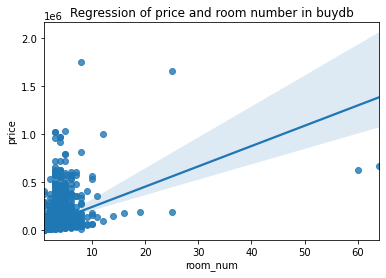

In [18]:
sns.regplot('room_num', 'price', data=buydb_cleaned)
plt.title('Regression of price and room number in buydb')

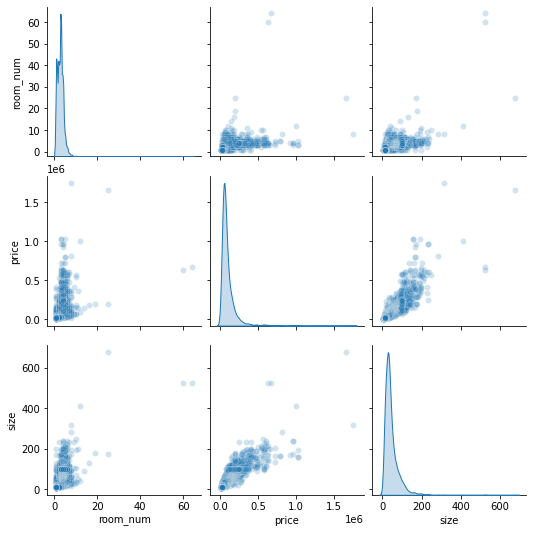

In [19]:
sns.pairplot(buydb_cleaned, diag_kind='kde', plot_kws={'alpha': 0.2})

## pandas.GroupBy

In [20]:
buydb_grouped = buydb_cleaned['price'].groupby(buydb_cleaned['room_num']) #price is grouped by room_num
buydb_grouped

Text(0.5, 0, 'Room Number')

Text(0, 0.5, 'Mean Price')

room_num
1      36511.867704
2      67793.788820
3      97550.000000
4     138568.918919
5     158256.018519
6     153354.639175
7     162503.125000
8     263236.842105
9     168225.000000
10    262033.333333
11    248200.000000
12    550850.000000
14    144700.000000
16    181200.000000
19    188500.000000
25    921850.000000
60    628300.000000
64    664500.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='room_num', ylabel='Mean Price'>

Text(0.5, 1.0, 'Mean price of different number of room')

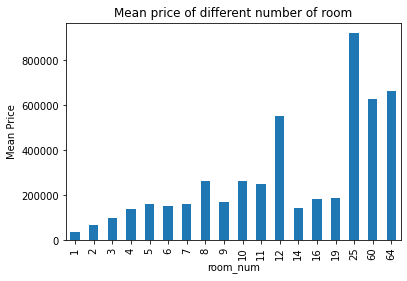

In [21]:
ax = plt.figure().add_subplot(1, 1, 1)
ax.set_xlabel('Room Number')
ax.set_ylabel('Mean Price')
buydb_grouped.mean() #count the mean value
buydb_grouped.mean().plot.bar()
plt.title('Mean price of different number of room')
plt.savefig('dataset/mean_price_of_room_num.jpg', dpi=300)

Text(0.5, 0, 'Room Number')

Text(0, 0.5, 'Frequency')

room_num
1     1028
2      966
3     1500
4      814
5      216
6       97
7       32
8       19
9        4
10       6
11       2
12       2
14       1
16       1
19       1
25       2
60       1
64       1
Name: price, dtype: int64

<AxesSubplot:xlabel='room_num', ylabel='Frequency'>

Text(0.5, 1.0, 'The count of different number of room')

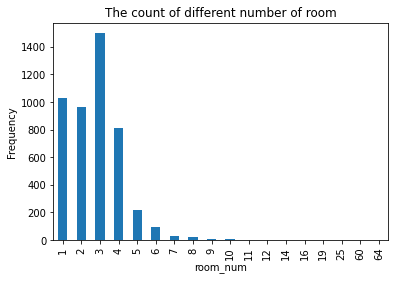

In [22]:
ax = plt.figure().add_subplot(1, 1, 1)
ax.set_xlabel('Room Number')
ax.set_ylabel('Frequency')
buydb_grouped.count() #count the number
buydb_grouped.count().plot.bar()
plt.title('The count of different number of room')
plt.savefig('dataset/frequency_of_room_num.jpg', dpi=300)

In [23]:
buydb_grouped2 = buydb_cleaned['price'].groupby([buydb_cleaned['mrt_name'], buydb_cleaned['room_num']]).mean()
buydb_grouped2

mrt_name  room_num
七張捷運站     7            88900.000000
三重國小捷運站   3           115000.000000
中山國中捷運站   1            38573.333333
          2            60840.000000
          3            92854.347826
                          ...      
龍山寺捷運站    4            57645.454545
          5            36500.000000
          7           113100.000000
          8            84100.000000
          64          664500.000000
Name: price, Length: 446, dtype: float64

In [24]:
writer2 = pd.ExcelWriter('dataset/buydb_grouped.xlsx')
buydb_grouped2.to_excel(writer2, 'Sheet1')
writer2.save()